In [5]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [6]:
df=pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
# delete a column
df = df.drop(columns = ['Id'])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
# to display stats about data
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
# to basic info about datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [10]:
# to display no. of samples on each class
df['Species'].value_counts()

,count
Species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


In [11]:
# check for null values
df.isnull().sum()

,0
SepalLengthCm,0
SepalWidthCm,0
PetalLengthCm,0
PetalWidthCm,0
Species,0


Exploratory Data Analysis

<Axes: >

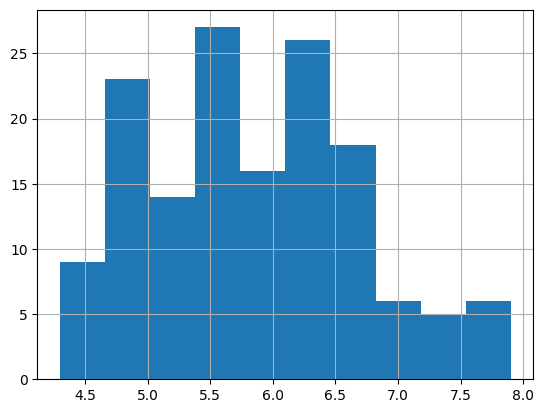

In [12]:
# histograms
df['SepalLengthCm'].hist()

<Axes: >

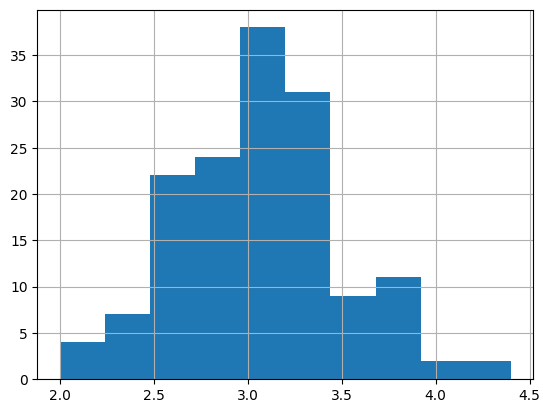

In [13]:
df['SepalWidthCm'].hist()

<Axes: >

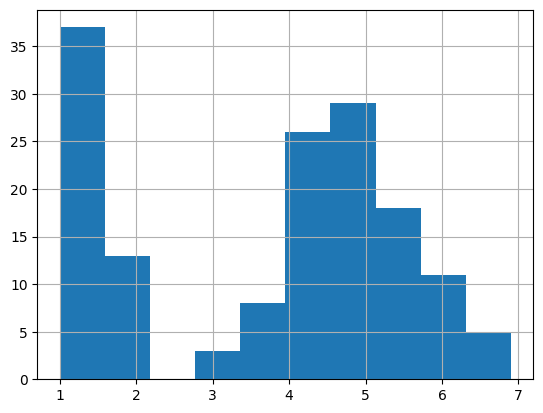

In [14]:
df["PetalLengthCm"].hist()

<Axes: >

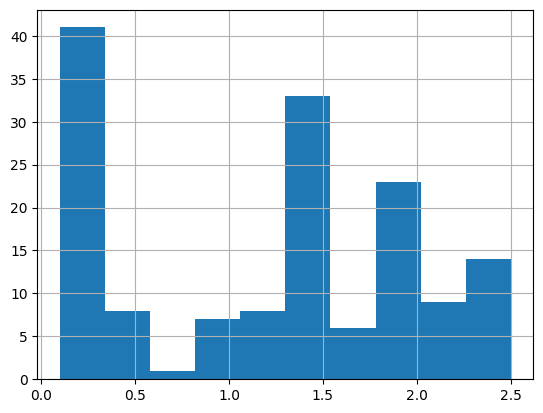

In [15]:
df["PetalWidthCm"].hist()

In [16]:
#Scatterplot
colors=["Blue","Green","Red"]
Species=['Iris-virginica','Iris-versicolor','Iris-setosa']

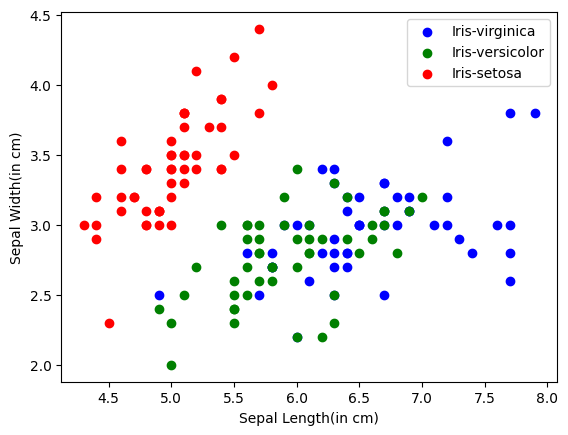

In [17]:
for i in range(3):
  x=df[df["Species"]==Species[i]]
  plt.scatter(x['SepalLengthCm'],x["SepalWidthCm"],color=colors[i],label=Species[i])
plt.xlabel("Sepal Length(in cm)")
plt.ylabel("Sepal Width(in cm)")
plt.legend()

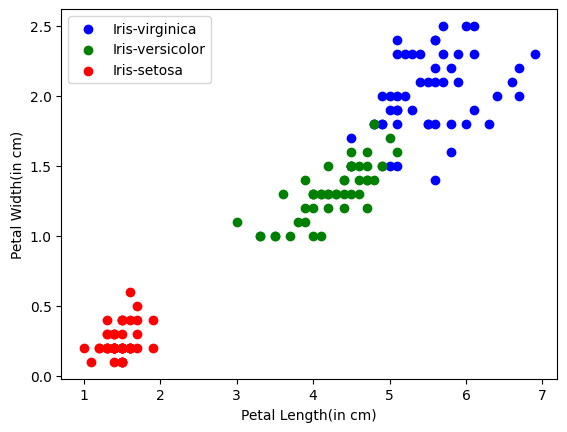

In [18]:
for i in range(3):
  x=df[df["Species"]==Species[i]]
  plt.scatter(x["PetalLengthCm"],x["PetalWidthCm"],color=colors[i],label=Species[i])
plt.xlabel("Petal Length(in cm)")
plt.ylabel("Petal Width(in cm)")
plt.legend()

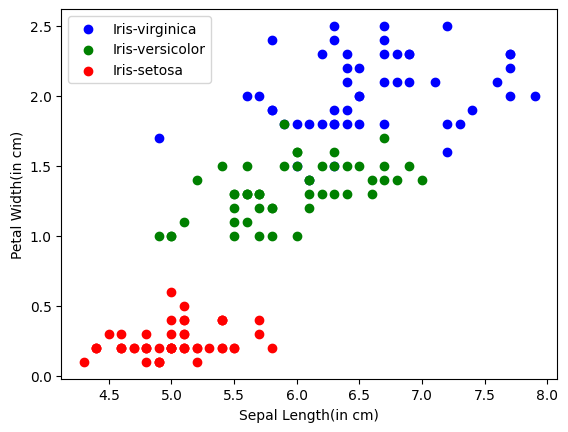

In [19]:
for i in range(3):
  x=df[df["Species"]==Species[i]]
  plt.scatter(x["SepalLengthCm"],x["PetalWidthCm"],color=colors[i],label=Species[i])
plt.xlabel("Sepal Length(in cm)")
plt.ylabel("Petal Width(in cm)")
plt.legend()

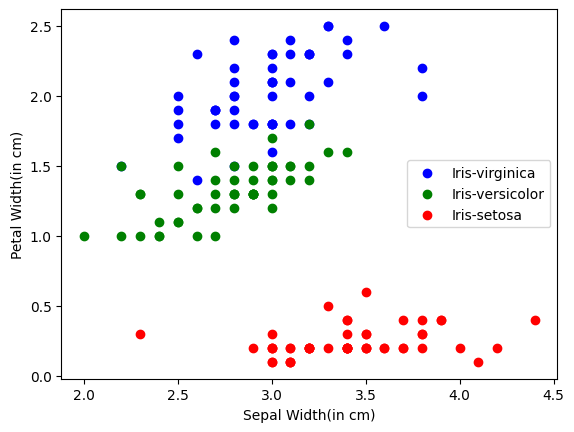

In [20]:
for i in range(3):
  x=df[df["Species"]==Species[i]]
  plt.scatter(x["SepalWidthCm"],x["PetalWidthCm"],color=colors[i],label=Species[i])
plt.xlabel("Sepal Width(in cm)")
plt.ylabel("Petal Width(in cm)")
plt.legend()


Coorelation Matrix

A correlation matrix is a table showing correlation coefficients between variables. Each cell in the table shows the correlation between two variables. The value is in the range of -1 to 1. If two varibles have high correlation, we can neglect one variable from those two.


In [21]:
df1=df.drop(columns=["Species"])
df1.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


<Axes: >

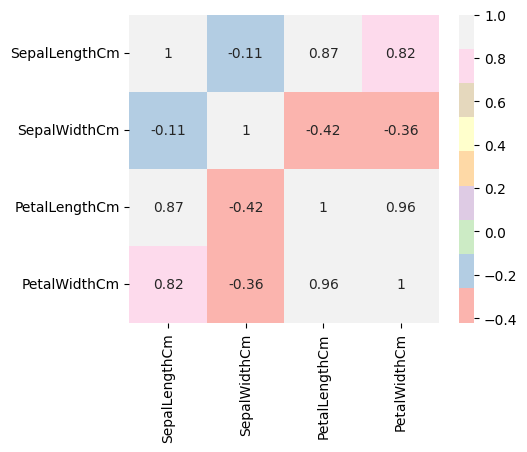

In [22]:
corr=df1.corr()
fig, ax = plt.subplots(figsize=(5,4))
sns.heatmap(corr, annot=True,ax=ax,cmap="Pastel1")


Label Encoder

In machine learning, we usually deal with datasets which contains multiple labels in one or more than one columns. These labels can be in the form of words or numbers. Label Encoding refers to converting the labels into numeric form so as to convert it into the machine-readable form


In [23]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()

In [24]:
df["Species"]=le.fit_transform(df["Species"])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# **Model Training**

In [25]:
from sklearn.model_selection import train_test_split
#train-85
#test-15
X=df.drop(columns={"Species"})
Y=df['Species']
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=30,random_state=30)

In [26]:
# logistic regression
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [27]:
#model training
model.fit(x_train,y_train)

LogisticRegression()

In [37]:
from sklearn.model_selection import GridSearchCV
parameter={'penalty':['l1','l2','elasticnet'],'C':[1,2,3,5,6,10,20,30,40,50],'max_iter':[100,200,300]}

In [38]:
model_regressor=GridSearchCV(model,param_grid=parameter,scoring='accuracy',cv=5)

In [39]:
model_regressor.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 2, 3, 5, 6, 10, 20, 30, 40, 50],
                         'max_iter': [100, 200, 300],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='accuracy')

In [40]:
print(model_regressor.best_params_)

{'C': 30, 'max_iter': 100, 'penalty': 'l2'}


In [41]:
print(model_regressor.best_score_)

0.975


In [42]:
y_pred=model_regressor.predict(x_test)

In [43]:
## accuracy score
from sklearn.metrics import accuracy_score,classification_report
score=accuracy_score(y_pred,y_test)
print(score)

0.9333333333333333


In [35]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.89      0.89      0.89         9
           2       0.89      0.89      0.89         9

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



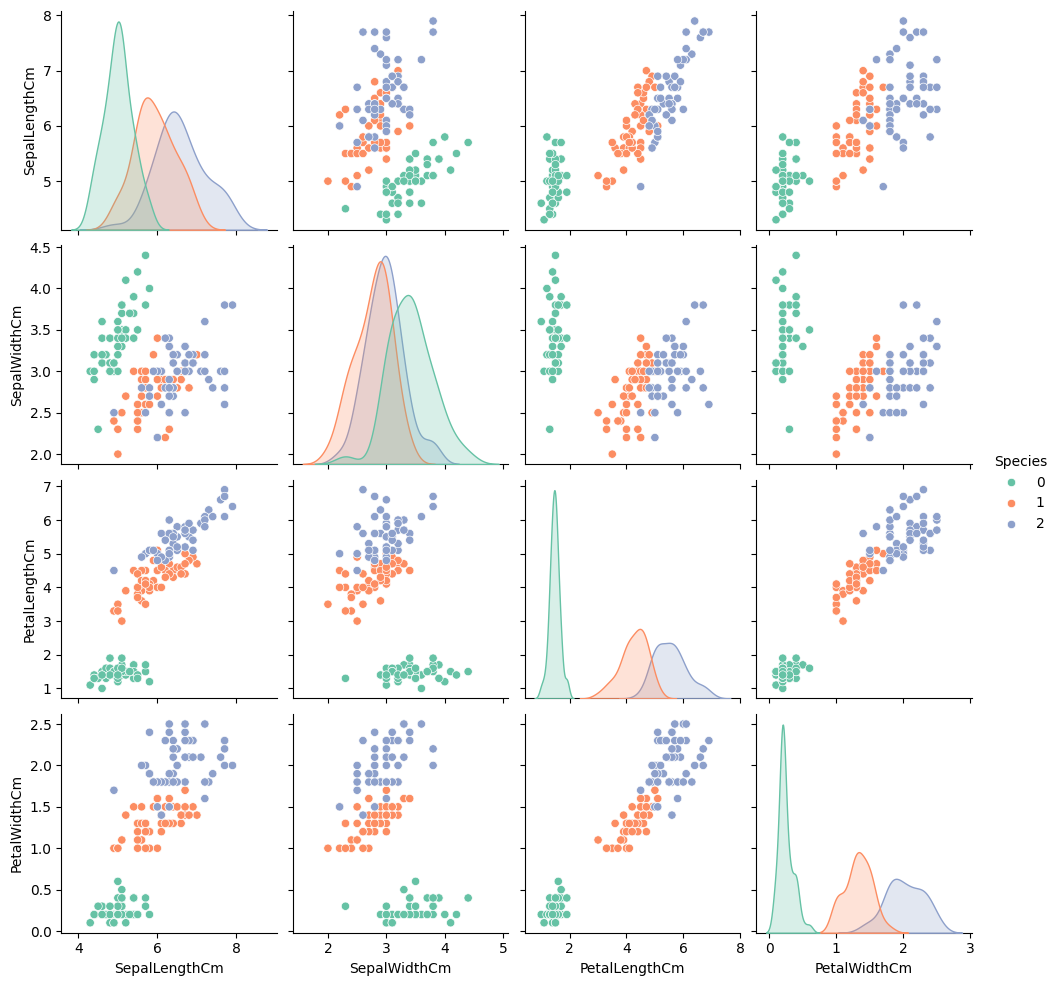

In [44]:
sns.pairplot(df,hue='Species',palette='Set2')